FileNotFoundError: [Errno 2] No such file or directory: '\\Users\\albar\\Desktop\\IITM_QRNG_Repo\\QRNG_Correlation_Analysis\\QRNG_Data\\Experiment_5\\ROI80x4_backgroundremoved\\BackgroundData320_0.txt'

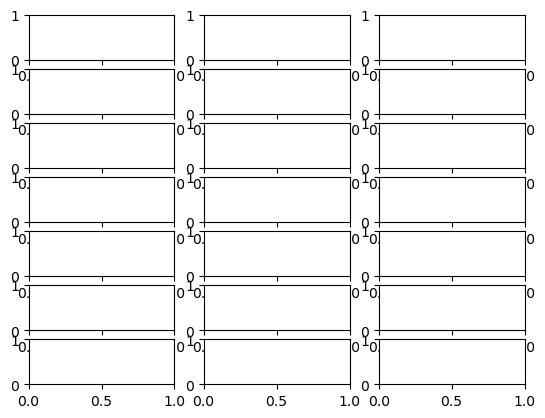

In [1]:
#Txt to Bin with Toeplitz

import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import toeplitz
from sortedcontainers import SortedDict
fig, ax = plt.subplots(7,3)
i=0
j=0
for exposure in range(0,1001,50):
    uart_grey = []
    Path = "\\Users\\albar\\Desktop\\IITM_QRNG_Repo\\QRNG_Correlation_Analysis\\QRNG_Data\\Experiment_5\\"
    #filename = Path + "ROI80x4_backgroundremoved\\exp" +str(exposure) + "gain20.000000Voltage1.800000\\IITM_QRNG150.txt"
    filename = Path + "ROI80x4_backgroundremoved\\BackgroundData320_" +str(exposure) + ".txt"
    with  open(filename) as fp:
        fp.seek(0)
        contents = fp.read()

        for entry in contents.split('\n'):
            try:
                uart_grey.append(int(entry))
            except:
                pass
    MyMap3 = SortedDict()
    MaxVal = 0
    avg = 0
    avg = np.average(uart_grey)
    for a in range(len(uart_grey)):
            Key = uart_grey[a] #- avg   
            if MyMap3.__contains__(Key) == True:
                OldVal = MyMap3.pop(Key)
                MyMap3.__setitem__(Key,OldVal+1)
                if OldVal+1 > MaxVal:
                    MaxVal = OldVal+1
            else:
                MyMap3.__setitem__(Key,1)
    #print("Normalizing X-axis %d is Done"%(1))

    for Key in MyMap3:
            OldVal = MyMap3.pop(Key)
            MyMap3.__setitem__(Key,OldVal)

    #print("Normalizing Y-axis %d is Done"%(1))

    try:
        uart_grey.remove(0)
        for i in range (0, 536):
            if (i+65000) in uart_grey:
                uart_grey.remove(i+65000)
    except:
        None


    MyMapKeys3 = MyMap3.keys()
    MyMapValues3 = MyMap3.values()
    #print("The sequece length is ", len(uart_grey))
    #print("The Map1 length is ",len(MyMap3))
    #print("The maximum values is ", np.max(uart_grey))
    #print("The minimum values is ", np.min(uart_grey))
    print("Exposure: ", exposure ," Average:",np.average(uart_grey), "  Variance:", np.var(uart_grey))
    #print("variance is",np.var(uart_grey))
    #print("Standard Dev is",np.std(uart_grey))
    #print("SanityCheck.png is created")
    #print("Half Maximum is ",np.max(uart_grey)/2)
    ax[j][i].bar(MyMap3.keys(), MyMap3.values(), label = 'exposure: %d'%exposure)
    ax[j][i].legend(loc='upper right')
    ax[j][i].set_ylabel("Count Frequency")
    ax[j][i].set_xlabel("Pixel Counts")
    ax[j][i].set_xlim(0,10)
    i = i+1
    if(i == 3):
        i=0
        j=j+1


plt.rcParams["figure.figsize"] = (20,30)

plt.legend()
plt.ylabel("Count Frequency")
plt.xlabel("Pixel Counts")
filename = r'Background_Distribution.png'
plt.savefig(filename, bbox_inches='tight')
plt.plot()
plt.show()

In [5]:
#Txt to Bin with Toeplitz

import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import toeplitz
from sortedcontainers import SortedDict

def Data_loading(filename):
    uart_grey = []
    with open(filename) as fp:
        fp.seek(0)
        contents = fp.read()
        for entry in contents.split('\n'):
            try:
                uart_grey.append(int(entry))
            except:
                pass
    return uart_grey
        
def Data_sorting(data, X_norm = False, Y_norm = True):
    MyMap3 = SortedDict()
    MaxVal = 0
    avg = np.average(data)
    for a in range(len(data)):
        if X_norm == True:
            Key = data[a] - avg
        else:
            Key = data[a]
        if MyMap3.__contains__(Key) == True:
            OldVal = MyMap3.pop(Key)
            MyMap3.__setitem__(Key,OldVal+1)
            if OldVal+1 > MaxVal:
                MaxVal = OldVal+1
        else:
            MyMap3.__setitem__(Key,1)
    if Y_norm == True:
        for Key in MyMap3:
                OldVal = MyMap3.pop(Key)
                MyMap3.__setitem__(Key,OldVal/len(data))
    return MyMap3.keys(), MyMap3.values()

def Data_plotting(x, y, exposure):
    #filename = r'Sanitycheckcloser.png'
    plt.bar(x, y, label = str(exposure)+" \u03BCs")
    #plt.savefig(filename)
    #plt.xlim(0,150)


40 the average is 15.220277777777778 variance is 11.955088811728395
190 the average is 51.430277777777775 variance is 47.07902770061729
340 the average is 88.97666666666667 variance is 91.51334444444446
490 the average is 127.79666666666667 variance is 123.7231
640 the average is 158.92111111111112 variance is 154.7787765432099
790 the average is 198.22 variance is 208.2454888888889
940 the average is 237.51055555555556 variance is 247.43655524691357


[]

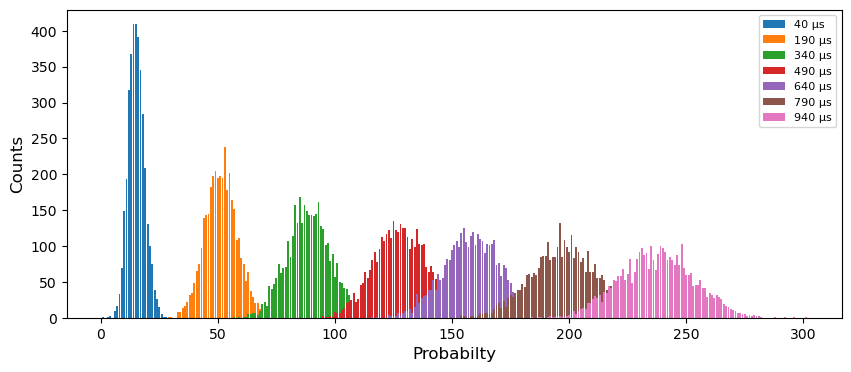

In [6]:
Folder = "C:/Users/albar/Desktop/IITM_QRNG/iitm_qrng_repos/QRNG_Correlation_Analysis/QRNG_Data/Experiment_8/CP41B/ROI60x60/exp"
File_final = "gain20.000000Voltage1.720000/IITM_QRNG87.txt"
plt.figure(figsize=(10,4),dpi = 100)
for i in range(40,990,150):
    filename = Folder+str(i)+File_final
    data = Data_loading(filename)
    keys,values = Data_sorting(data, Y_norm = False)
    Data_plotting(keys,values, i)
    print(i,"the average is",np.average(data),"variance is",np.var(data))


plt.xlabel("Probabilty", fontsize=12)
plt.ylabel("Counts", fontsize=12)
plt.legend(loc= 'upper right', fontsize=8)
plt.savefig("Poisson Evolution.png", bbox_inches = "tight")
plt.plot()

In [28]:
Folder = "C:/Users/albar/Desktop/IITM_QRNG/iitm_qrng_repos/QRNG_Correlation_Analysis/QRNG_Data/Experiment_8/TLHG/ROI60x60/exp"
File_final = "gain20.000000Voltage1.910000/IITM_QRNG87.txt"
plt.figure(figsize=(10,4),dpi = 100)
Dist_average = []
Dist_var = []
exposure = []
for i in range(40,990,25):
    filename = Folder+str(i)+File_final
    data = Data_loading(filename)
    Dist_var.append(np.var(data))
    Dist_average.append(np.average(data))
    exposure.append(i)

for i in range(0, len(exposure), 1):
    print(exposure[i], Dist_average[i])
print((Dist_average[6]-Dist_average[3])/(exposure[6]-exposure[3]))
plt.plot(exposure, Dist_var, color = "red")
plt.plot(exposure, Dist_average)
plt.xlabel("Probabilty", fontsize=12)
plt.ylabel("Counts", fontsize=12)
plt.legend(loc= 'upper right', fontsize=8)
plt.savefig("Poisson Evolution.png", bbox_inches = "tight")
plt.plot()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


40 21.496111111111112
65 30.217222222222222
90 40.445277777777775
115 50.483333333333334
140 60.73722222222222
165 70.77
190 81.0875
215 91.23722222222223
240 101.39055555555555
265 111.49416666666667
290 122.17083333333333
315 133.2397222222222
340 142.465
365 152.3761111111111
390 163.60416666666666
415 174.0613888888889
440 182.73194444444445
465 193.11638888888888
490 203.8163888888889
515 215.3502777777778
540 224.4272222222222
565 235.03083333333333
590 235.45027777777779
615 245.95277777777778
640 255.08277777777778
665 265.6975
690 276.11611111111114
715 286.4291666666667
740 296.44416666666666
765 308.15833333333336
790 318.49
815 327.87166666666667
840 339.20472222222224
865 348.5202777777778
890 359.0941666666667
915 370.1463888888889
940 380.73083333333335
965 389.7525
0.4080555555555556


[]

[]

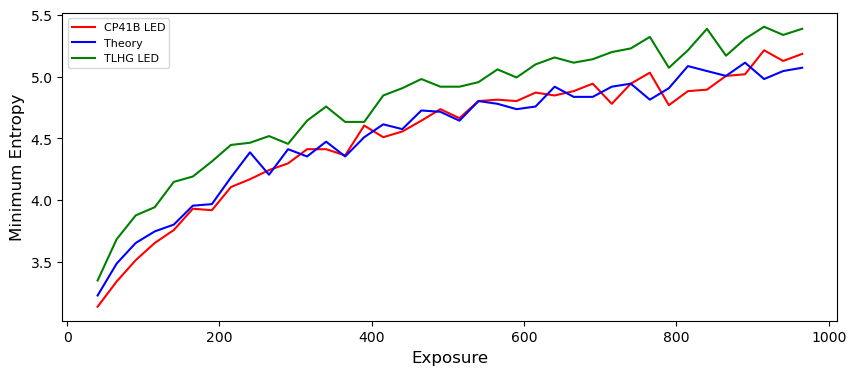

In [20]:
def Dict_sort(data, x_norm=False, y_norm=False):
    
    Map = SortedDict()
    avg = np.average(data)
    Max_val = 0 
    
    for val in data:
        # Add new item, normalized or not
        if x_norm == True:
             Key = val - avg
        else:
            Key = val

        # Look in the map, if new, make a new entry. otherwise, add one.
        if Map.__contains__(Key) == True:
            Old_val = Map.pop(Key)
            Map.__setitem__(Key,Old_val+1)
        else:
            Map.__setitem__(Key,1)

    if y_norm == True:
        for Key in Map:
            temp = Map.pop(Key)
            Map.__setitem__(Key,temp/len(data))
    return Map

def Min_entropy(data):
    Map = Dict_sort(data,x_norm = False, y_norm = True)
    entropy = - np.log2(max(Map.values()))
    return entropy

def Poisson_list(Center, Samples):
    s = []
    for i in range(0, Samples, 1):
        s.append(np.random.poisson(Center))
    return s

Folder = "C:/Users/albar/Desktop/IITM_QRNG/iitm_qrng_repos/QRNG_Correlation_Analysis/QRNG_Data/Experiment_8/CP41B/ROI60x60/exp"
File_final = "gain20.000000Voltage1.720000/IITM_QRNG87.txt"
plt.figure(figsize=(10,4),dpi = 100)
x = []
y = []
entropy_array = []
for i in range(40,990,25):
    filename = Folder+str(i)+File_final
    data = Data_loading(filename)
    entropy_array.append(Min_entropy(Poisson_list(np.average(data), len(data))))
    y.append(Min_entropy(data))
    x.append(i)
plt.plot(x,y, color = "red", label = "CP41B LED")
plt.plot(x, entropy_array, color= "blue", label = "Theory")

Folder = "C:/Users/albar/Desktop/IITM_QRNG/iitm_qrng_repos/QRNG_Correlation_Analysis/QRNG_Data/Experiment_8/TLHG/ROI60x60/exp"
File_final = "gain20.000000Voltage1.910000/IITM_QRNG87.txt"
x = []
y = []
entropy_array = []
for i in range(40,990,25):
    filename = Folder+str(i)+File_final
    data = Data_loading(filename)
    entropy_array.append(Min_entropy(Poisson_list(np.average(data), len(data))))
    y.append(Min_entropy(data))
    x.append(i)
    
plt.plot(x,y, color = "green", label = "TLHG LED")
plt.legend()
plt.xlabel("Exposure", fontsize=12)
plt.ylabel("Minimum Entropy", fontsize=12)
plt.legend(loc= 'upper left', fontsize=8)
#plt.savefig("Poisson Evolution.png", bbox_inches = "tight")
plt.plot()